In [1]:
#HSV segmentation

In [2]:
%matplotlib inline

/Users/rolland/anaconda2/lib/python2.7/site-packages/matplotlib/font_manager.py:273: UserWarning: Matplotlib is building the font cache using fc-list. This may take a moment.
  warnings.warn('Matplotlib is building the font cache using fc-list. This may take a moment.')


In [3]:
from matplotlib import pyplot as plt
from skimage import data,color, exposure,feature,io
from math import sqrt
from PIL import Image
import numpy as np

In [4]:
#loading data

In [5]:
im1 = Image.open('onlineSamples/textures/1.jpg')
im2 = Image.open('onlineSamples/textures/2.jpg')
im3 = Image.open('onlineSamples/textures/3.jpg')



imgSamples = [];
imgHsvSamples = [];

for n in range(0,18):
    imgSamples.append(np.array(Image.open('renamed-samples1/'+str(n+1)+'.bmp')))
                      
for n in range(0,18):
    imgHsvSamples.append(color.rgb2hsv(imgSamples[n]))


print(len(imgSamples))  
print(len(imgHsvSamples))  
print(imgSamples[0].shape);
print(imgHsvSamples[0].shape);

npimg1 = np.array(im1)
npimg2 = np.array(im2)
npimg3 = np.array(im3)

img_hsv1 = color.rgb2hsv(npimg1)
img_hsv2 = color.rgb2hsv(npimg2)
img_hsv3 = color.rgb2hsv(npimg3)
print(npimg1.shape,npimg2.shape,npimg3.shape)
print(img_hsv1.shape,img_hsv2.shape,img_hsv3.shape)

((352, 424, 3), (426, 392, 3), (416, 378, 3))
((352, 424, 3), (426, 392, 3), (416, 378, 3))


In [6]:
#plotting

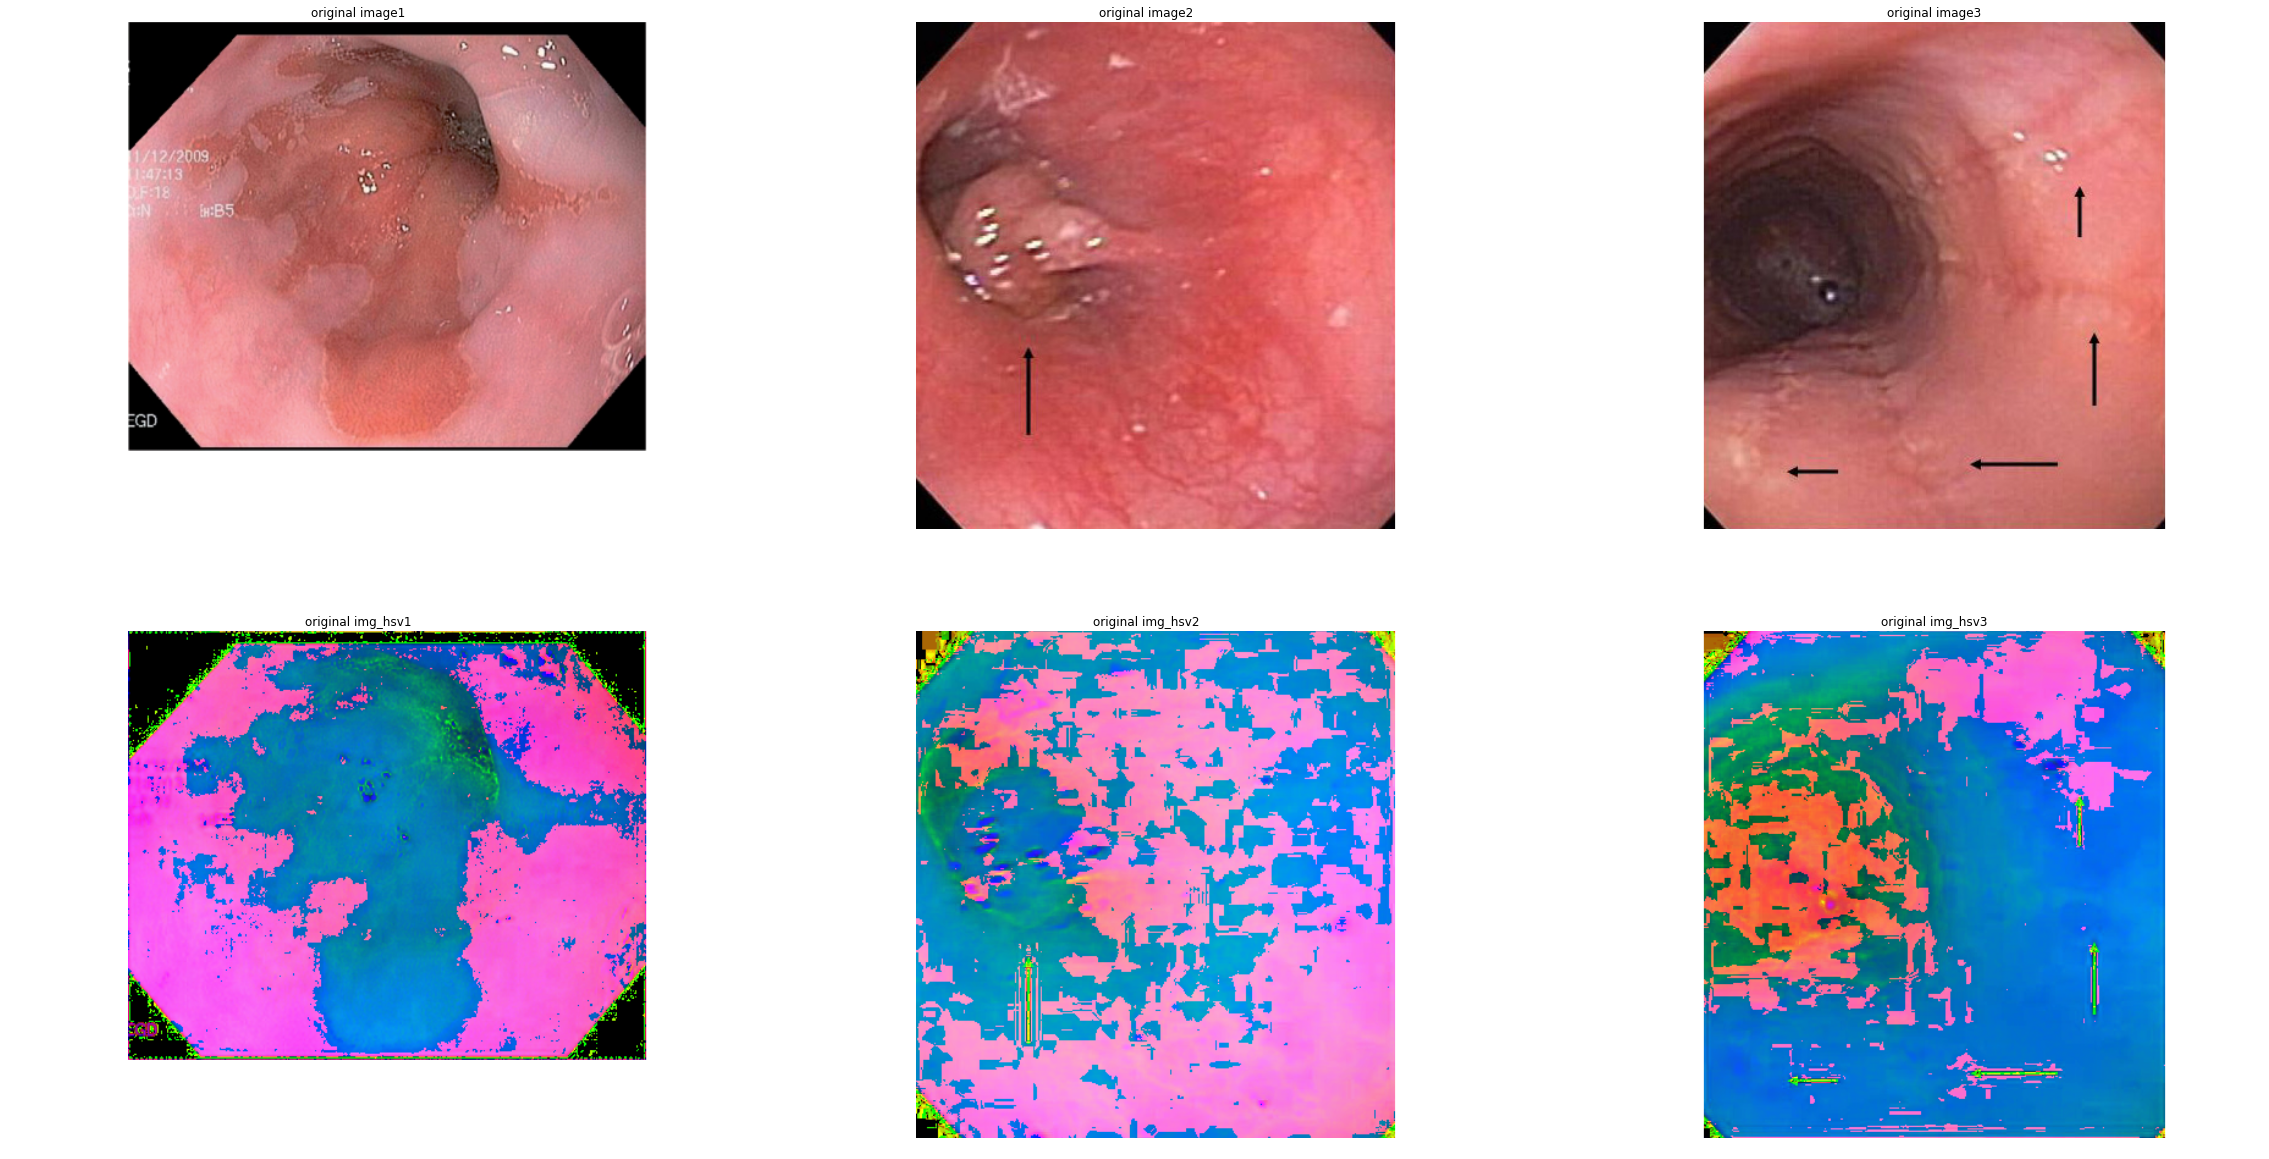

In [7]:
fig, axes= plt.subplots(2, 3, figsize=(40, 10*2), sharex=True, sharey=True)
ax = axes.ravel();

ax[0].imshow(npimg1,cmap='gray')
ax[0].set_title("original image1")
ax[0].axis('off')

ax[1].imshow(npimg2,cmap='gray')
ax[1].set_title("original image2")
ax[1].axis('off')


ax[2].imshow(npimg3,cmap='gray')
ax[2].set_title("original image3")
ax[2].axis('off')


ax[3].imshow(img_hsv1,cmap='gray')
ax[3].set_title("original img_hsv1")
ax[3].axis('off')

ax[4].imshow(img_hsv2,cmap='gray')
ax[4].set_title("original img_hsv2")
ax[4].axis('off')


ax[5].imshow(img_hsv3,cmap='gray')
ax[5].set_title("original img_hsv3")
ax[5].axis('off')
    
plt.show()

In [8]:
##saturation thresholding

In [9]:
def satThreshold(v,s):    ##return hue or intensity as dominant feature
    th = 1.0 - 0.8*v;
    if(s>th):
        return "h"
    else: 
        return "v"
    

In [10]:
def approximate(img):
    tmpImg = np.zeros(img.shape)
    for i in range(img.shape[0]):
        for j in range(img.shape[1]):
            dominantVal = satThreshold(img[i,j,2],img[i,j,1])
#             print("dominantVal----"+dominantVal)
            tmpImg[i,j,:] = img[i,j,:]
            if dominantVal == "h":
                tmpImg[i,j,0] = img[i,j,0]
                tmpImg[i,j,1] = 1.0
                tmpImg[i,j,2] = 1.0
                
            else:
                tmpImg[i,j,0] = 1.0
                tmpImg[i,j,1] = 1.0
                tmpImg[i,j,2] = img[i,j,2]
        
    return tmpImg

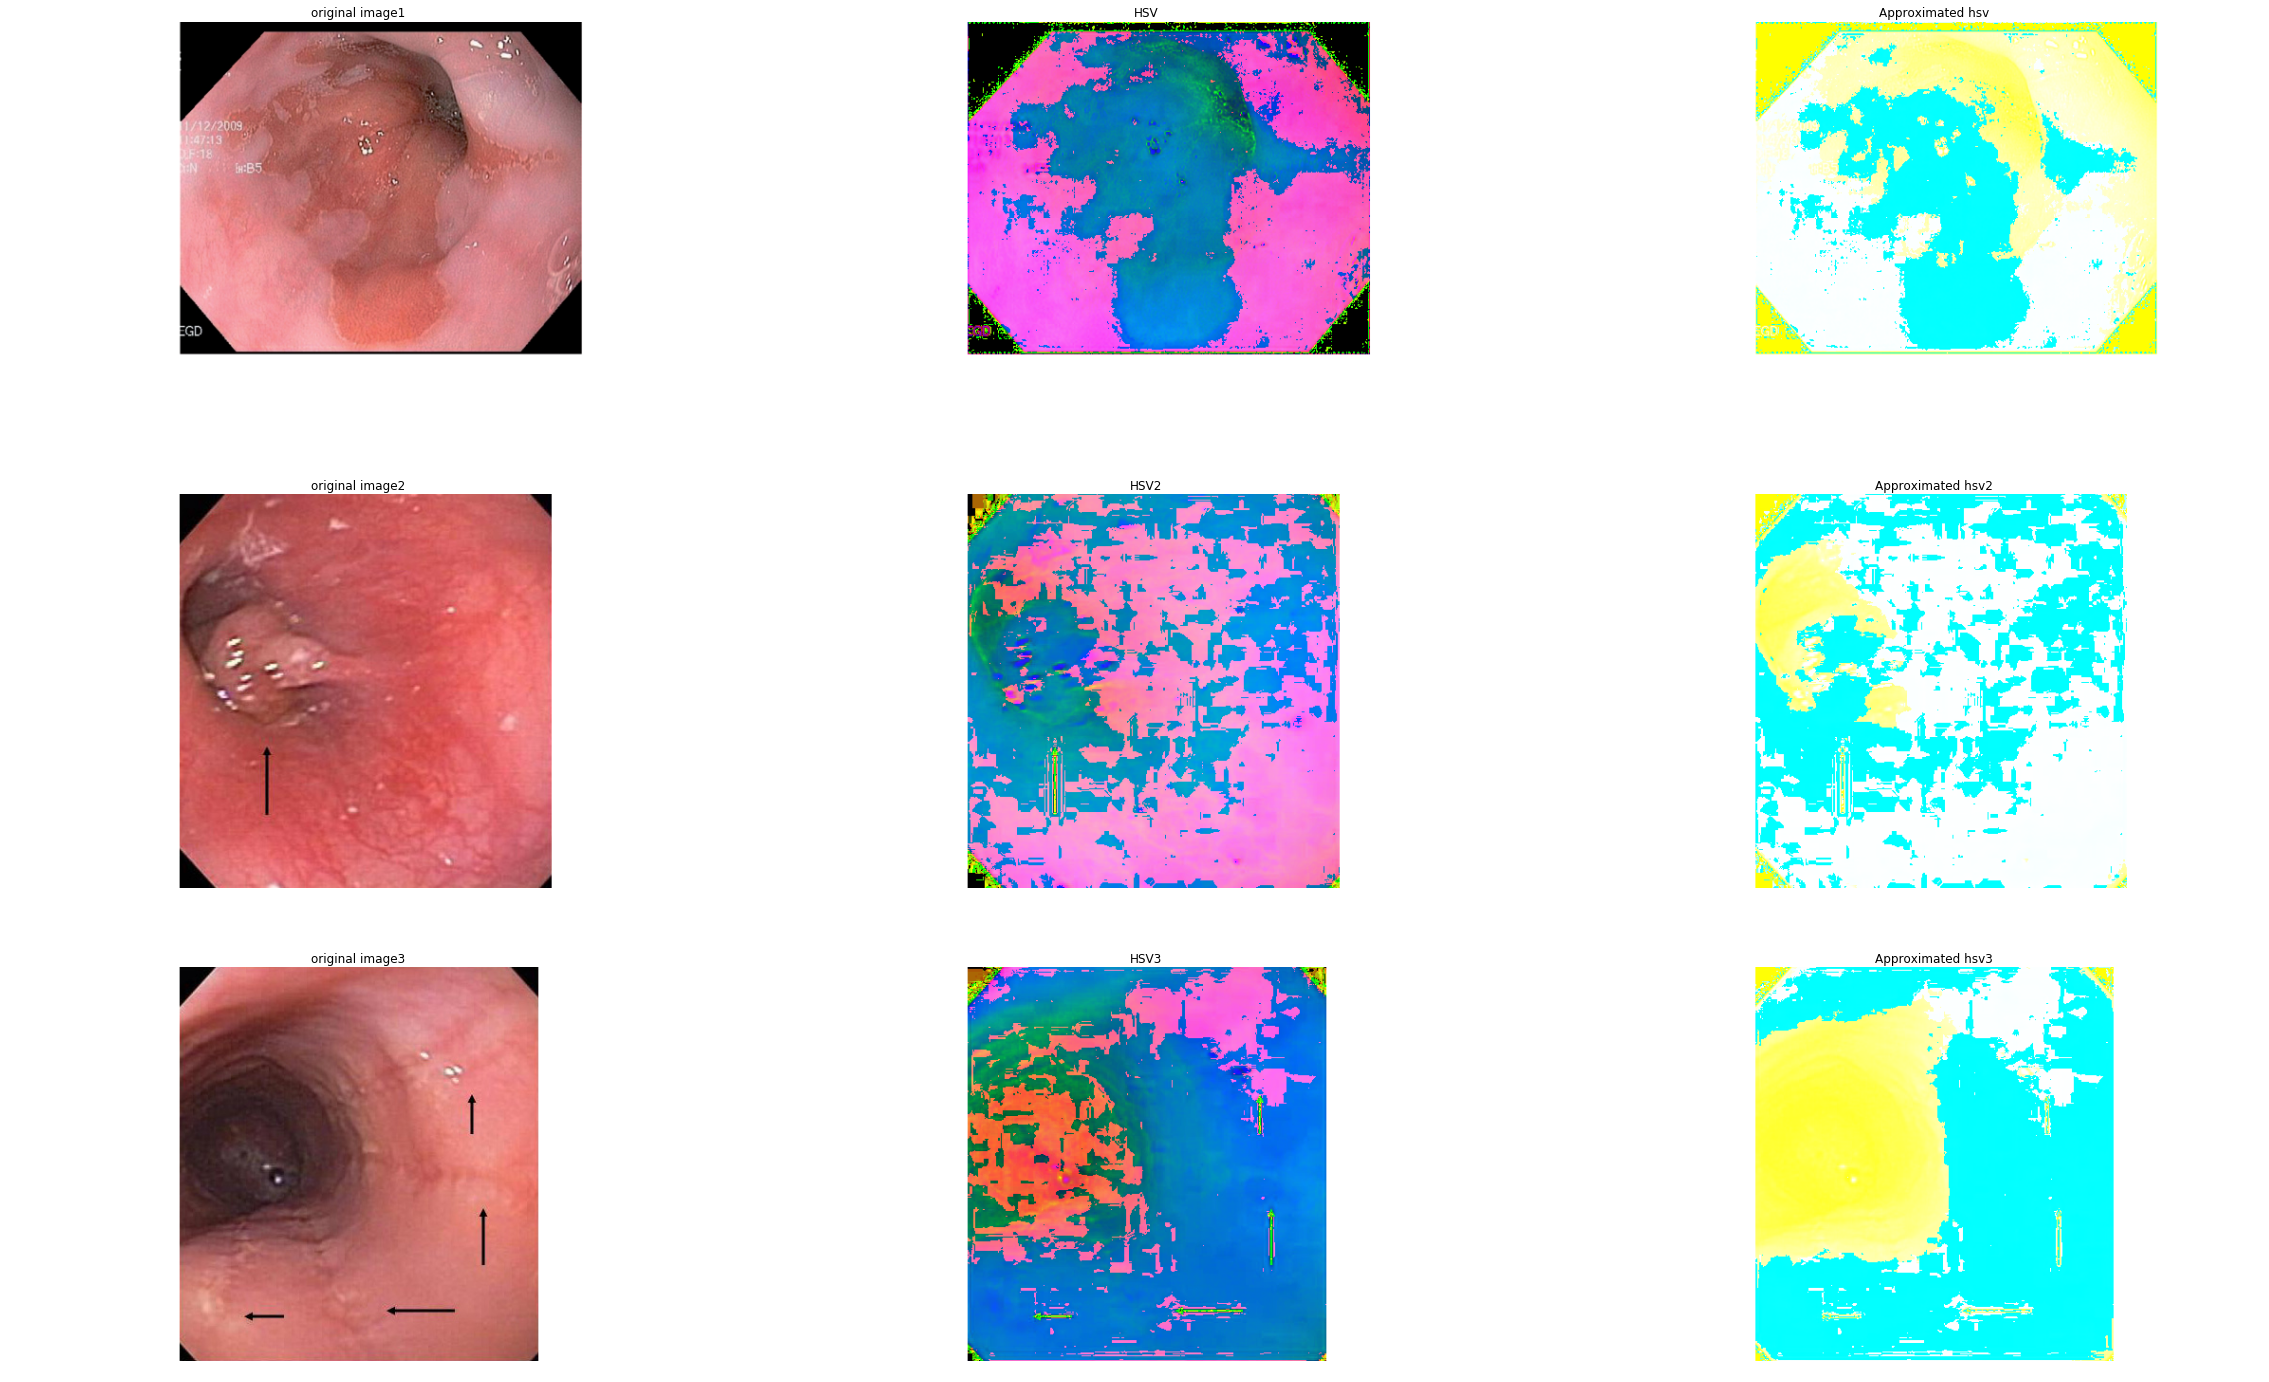

In [11]:
approximate(img_hsv1)
fig, axes= plt.subplots(3, 3, figsize=(40, 8*3), sharex=True, sharey=True)
ax = axes.ravel();

ax[0].imshow(npimg1,cmap='gray')
ax[0].set_title("original image1")
ax[0].axis('off')

ax[1].imshow(img_hsv1,cmap='gray')
ax[1].set_title("HSV")
ax[1].axis('off')


ax[2].imshow(approximate(img_hsv1),cmap='gray')
ax[2].set_title("Approximated hsv")
ax[2].axis('off')


ax[3].imshow(npimg2,cmap='gray')
ax[3].set_title("original image2")
ax[3].axis('off')

ax[4].imshow(img_hsv2,cmap='gray')
ax[4].set_title("HSV2")
ax[4].axis('off')


ax[5].imshow(approximate(img_hsv2),cmap='gray')
ax[5].set_title("Approximated hsv2")
ax[5].axis('off')



ax[6].imshow(npimg3,cmap='gray')
ax[6].set_title("original image3")
ax[6].axis('off')

ax[7].imshow(img_hsv3,cmap='gray')
ax[7].set_title("HSV3")
ax[7].axis('off')


ax[8].imshow(approximate(img_hsv3),cmap='gray')
ax[8].set_title("Approximated hsv3")
ax[8].axis('off')

    
plt.show()